In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [2]:

# Load the dataset
data = pd.read_csv('../feature_engineered_fight.csv')

# Inspect the data
display(data.head())

,method,referee,weightclass,winner,f1,f2,f1_slmp,f2_slmp,f1_str_acc_%,f2_str_acc_%,f1_sapm,f2_sapm,f1_str_def_%,f2_str_def_%,f1_td_avg,f2_td_avg,f1_td_acc_%,f2_td_acc_%,f1_td_def_%,f2_td_def_%,f1_sub_avg,f2_sub_avg,f1_height,f2_height,f1_weight,f2_weight,f1_reach,f2_reach,f1_stance,f2_stance
0,Decision - Unanimous,Herb Dean,featherweight,f1,Lerone Murphy,Edson Barboza,8.80,3.16,60.44,32.64,3.16,8.80,67.36,39.56,2.40,0.00,66,0,100,34,0.00,0.0,175.26,180.34,65.77,65.77,185.42,190.50,Orthodox,Orthodox
1,KO/TKO,Dan Miragliotta,welterweight,f1,Khaos Williams,Carlston Harris,8.00,9.33,60.00,46.67,9.33,8.00,53.33,40.00,0.00,0.00,0,0,100,100,0.00,0.0,182.88,182.88,77.11,77.11,195.58,193.04,Orthodox,Orthodox
2,Decision - Unanimous,Mark Smith,welterweight,f1,Themba Gorimbo,Ramiz Brahimaj,2.87,0.20,82.69,50.00,0.20,2.87,50.00,17.31,5.00,1.00,83,12,88,17,0.00,0.0,185.42,177.80,77.11,77.11,195.58,182.88,Orthodox,Orthodox
3,KO/TKO,Chris Tognoni,bantamweight,f1,Adrian Yanez,Vinicius Salvador,12.93,6.11,64.29,50.00,6.11,12.93,50.00,35.71,0.00,0.00,0,0,100,100,0.00,0.0,170.18,170.18,61.23,61.23,177.80,177.80,Orthodox,Southpaw
4,Submission,Herb Dean,strawweight,f1,Angela Hill,Luana Pinheiro,3.04,1.85,35.44,28.33,1.85,3.04,71.67,64.56,3.26,1.63,33,14,86,67,0.11,0.0,160.02,157.48,52.16,52.16,162.56,157.48,Orthodox,Orthodox


In [3]:
data.shape

(7289, 30)

> shuffle data to handle imbalance

In [4]:
# Duplicate the DataFrame
duplicated_data = data.copy()

# Rename the columns
column_mapping = {col: col.replace('f1_', 'temp_').replace('f2_', 'f1_').replace('temp_', 'f2_') for col in data.columns}
duplicated_data.rename(columns=column_mapping, inplace=True)

# Change the values in the 'winner' column to 'f2'
duplicated_data['winner'] = 'f2'

# Output the first few rows to verify
display(duplicated_data.head())

,method,referee,weightclass,winner,f1,f2,f2_slmp,f1_slmp,f2_str_acc_%,f1_str_acc_%,f2_sapm,f1_sapm,f2_str_def_%,f1_str_def_%,f2_td_avg,f1_td_avg,f2_td_acc_%,f1_td_acc_%,f2_td_def_%,f1_td_def_%,f2_sub_avg,f1_sub_avg,f2_height,f1_height,f2_weight,f1_weight,f2_reach,f1_reach,f2_stance,f1_stance
0,Decision - Unanimous,Herb Dean,featherweight,f2,Lerone Murphy,Edson Barboza,8.80,3.16,60.44,32.64,3.16,8.80,67.36,39.56,2.40,0.00,66,0,100,34,0.00,0.0,175.26,180.34,65.77,65.77,185.42,190.50,Orthodox,Orthodox
1,KO/TKO,Dan Miragliotta,welterweight,f2,Khaos Williams,Carlston Harris,8.00,9.33,60.00,46.67,9.33,8.00,53.33,40.00,0.00,0.00,0,0,100,100,0.00,0.0,182.88,182.88,77.11,77.11,195.58,193.04,Orthodox,Orthodox
2,Decision - Unanimous,Mark Smith,welterweight,f2,Themba Gorimbo,Ramiz Brahimaj,2.87,0.20,82.69,50.00,0.20,2.87,50.00,17.31,5.00,1.00,83,12,88,17,0.00,0.0,185.42,177.80,77.11,77.11,195.58,182.88,Orthodox,Orthodox
3,KO/TKO,Chris Tognoni,bantamweight,f2,Adrian Yanez,Vinicius Salvador,12.93,6.11,64.29,50.00,6.11,12.93,50.00,35.71,0.00,0.00,0,0,100,100,0.00,0.0,170.18,170.18,61.23,61.23,177.80,177.80,Orthodox,Southpaw
4,Submission,Herb Dean,strawweight,f2,Angela Hill,Luana Pinheiro,3.04,1.85,35.44,28.33,1.85,3.04,71.67,64.56,3.26,1.63,33,14,86,67,0.11,0.0,160.02,157.48,52.16,52.16,162.56,157.48,Orthodox,Orthodox


In [5]:
merged_data = pd.concat([data, duplicated_data], ignore_index=True)
merged_data['winner'].value_counts()

winner
f1    7289
f2    7289
Name: count, dtype: int64

In [6]:
merged_data.head()
merged_data['f1_stance'] = merged_data['f1_stance'].replace(['Southpaw', 'Switch', 'Open Stance', 'Sideways'], 'Unorthodox')
merged_data['f2_stance'] = merged_data['f2_stance'].replace(['Southpaw', 'Switch', 'Open Stance', 'Sideways'], 'Unorthodox')

In [7]:

# Split data into features and target variable
X = merged_data.drop(columns=['winner', 'f1', 'f2'])
y = merged_data['winner']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define column transformer for encoding categorical variables and scaling numerical variables
categorical_cols = ['f1_stance', 'f2_stance', 'method', 'referee', 'weightclass']  # Assuming these are categorical columns
numerical_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical columns
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical columns
    ])

def train_evaluate_pipeline(model, X_train, y_train, X_test, y_test):
    pipeline = make_pipeline(preprocessor, model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return pipeline, accuracy, conf_matrix

# Logistic Regression
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_pipeline, accuracy_lr, conf_matrix_lr = train_evaluate_pipeline(logistic_regression_model, X_train, y_train, X_test, y_test)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_lr)

# Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_pipeline, accuracy_rf, conf_matrix_rf = train_evaluate_pipeline(random_forest_model, X_train, y_train, X_test, y_test)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)

# Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_pipeline, accuracy_gb, conf_matrix_gb = train_evaluate_pipeline(gradient_boosting_model, X_train, y_train, X_test, y_test)
print("Gradient Boosting Accuracy:", accuracy_gb)
print("Gradient Boosting Confusion Matrix:\n", conf_matrix_gb)

Logistic Regression Accuracy: 0.8463648834019204
Logistic Regression Confusion Matrix:
 [[1231  242]
 [ 206 1237]]
Random Forest Accuracy: 0.8463648834019204
Random Forest Confusion Matrix:
 [[1241  232]
 [ 216 1227]]
Gradient Boosting Accuracy: 0.8713991769547325
Gradient Boosting Confusion Matrix:
 [[1281  192]
 [ 183 1260]]


In [8]:
# drop referee as we do not have than information 
X = merged_data.drop(columns=['referee', 'winner', 'f1', 'f2','method', 'f1_height', 'f2_height', 'f1_weight', 'f2_weight', 'f2_str_def_%', 'f1_str_def_%'])
y = merged_data['winner']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define column transformer for encoding categorical variables and scaling numerical variables
categorical_cols = ['f1_stance', 'f2_stance', 'weightclass']
numerical_cols = [col for col in X.columns if col not in categorical_cols]


In [9]:
## remove method as we won't know that prefight

# Split data into features and target variable
X = merged_data.drop(columns=['winner', 'f1', 'f2','method'])
y = merged_data['winner']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define column transformer for encoding categorical variables and scaling numerical variables
categorical_cols = ['f1_stance', 'f2_stance', 'referee', 'weightclass']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical columns
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical columns
    ])

def train_evaluate_pipeline(model, X_train, y_train, X_test, y_test):
    pipeline = make_pipeline(preprocessor, model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return pipeline, accuracy, conf_matrix

# Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_pipeline, accuracy_gb, conf_matrix_gb = train_evaluate_pipeline(gradient_boosting_model, X_train, y_train, X_test, y_test)
print("Gradient Boosting Accuracy:", accuracy_gb)
print("Gradient Boosting Confusion Matrix:\n", conf_matrix_gb)

Gradient Boosting Accuracy: 0.852880658436214
Gradient Boosting Confusion Matrix:
 [[1246  227]
 [ 202 1241]]


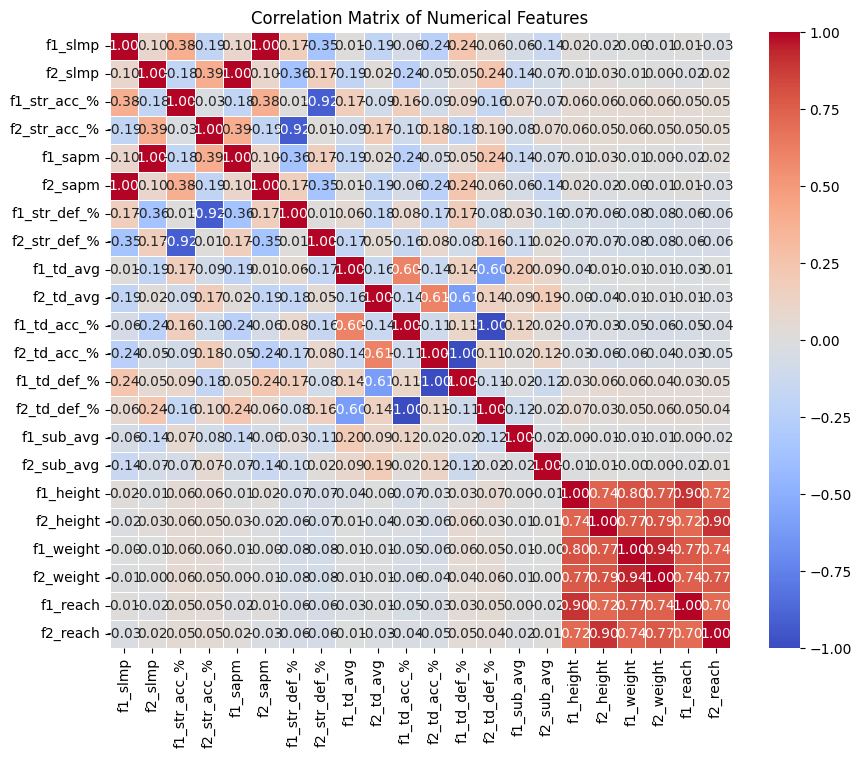

In [10]:
# Split data into features and target variable
X = merged_data.drop(columns=['winner', 'f1', 'f2','method',])
y = merged_data['winner']

numerical_cols = [col for col in X.columns if col not in categorical_cols]
numerical_data = X_train[numerical_cols]
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

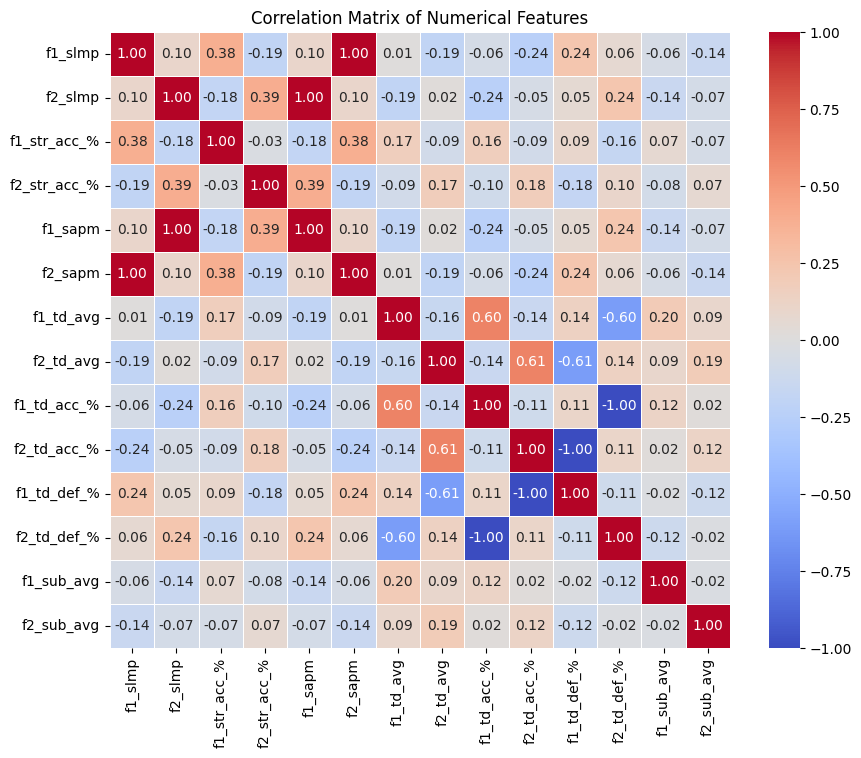

In [11]:
# Split data into features and target variable
X = merged_data.drop(columns=['winner', 'f1', 'f2','method', 'f1_height', 'f2_height', 'f1_weight', 'f2_weight', 'f1_reach', 'f2_reach', 'f2_str_def_%', 'f1_str_def_%'])
y = merged_data['winner']

numerical_cols = [col for col in X.columns if col not in categorical_cols]
numerical_data = X_train[numerical_cols]
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [12]:
# drop referee as we do not have than information 
X = merged_data.drop(columns=['referee', 'winner', 'f1', 'f2','method', 'f1_height', 'f2_height', 'f1_weight', 'f2_weight', 'f2_str_def_%', 'f1_str_def_%'])
y = merged_data['winner']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define column transformer for encoding categorical variables and scaling numerical variables
categorical_cols = ['f1_stance', 'f2_stance', 'weightclass']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical columns
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical columns
    ])

def train_evaluate_pipeline(model, X_train, y_train, X_test, y_test):
    pipeline = make_pipeline(preprocessor, model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return pipeline, accuracy, conf_matrix

# Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_pipeline, accuracy_gb, conf_matrix_gb = train_evaluate_pipeline(gradient_boosting_model, X_train, y_train, X_test, y_test)
print("Gradient Boosting Accuracy:", accuracy_gb)
print("Gradient Boosting Confusion Matrix:\n", conf_matrix_gb)

Gradient Boosting Accuracy: 0.8511659807956105
Gradient Boosting Confusion Matrix:
 [[1241  232]
 [ 202 1241]]


### pickle the prepprocessing pipeline and model

In [13]:
import pickle

# Drop the unnecessary columns
X = merged_data.drop(columns=['referee', 'winner', 'f1', 'f2', 'method', 'f1_height', 'f2_height', 'f1_weight', 'f2_weight', 'f2_str_def_%', 'f1_str_def_%'])
y = merged_data['winner']

# Define column transformer for encoding categorical variables and scaling numerical variables
categorical_cols = ['f1_stance', 'f2_stance', 'weightclass']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical columns
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical columns
    ])

# Function to train and evaluate pipeline
def train_evaluate_pipeline(model, X, y):
    pipeline = make_pipeline(preprocessor, model)
    pipeline.fit(X, y)
    return pipeline

# Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_pipeline = train_evaluate_pipeline(gradient_boosting_model, X, y)

# Print the model performance on the training data
y_pred_train = gradient_boosting_pipeline.predict(X)
accuracy_train = accuracy_score(y, y_pred_train)
conf_matrix_train = confusion_matrix(y, y_pred_train)
print("Gradient Boosting Accuracy on Training Data:", accuracy_train)
print("Gradient Boosting Confusion Matrix on Training Data:\n", conf_matrix_train)

# Save the preprocessor and model
with open('gradient_boosting_pipeline.pkl', 'wb') as file:
    pickle.dump(gradient_boosting_pipeline, file)

print("Model and preprocessor have been saved to 'gradient_boosting_pipeline.pkl'.")


Gradient Boosting Accuracy on Training Data: 0.8608176704623405
Gradient Boosting Confusion Matrix on Training Data:
 [[6279 1010]
 [1019 6270]]
Model and preprocessor have been saved to 'gradient_boosting_pipeline.pkl'.


In [14]:
# try model :

In [15]:
import pickle

# Load the model and preprocessor
with open('gradient_boosting_pipeline.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)

# Example of making predictions on new data
new_data = pd.DataFrame({
    'f1_stance': ['Orthodox'],
    'f2_stance': ['Orthodox'],
    'weightclass': ['lightweight'],
    'f1_slmp': [200],
    'f2_slmp': [180],
    'f1_str_acc_%': [50.0],
    'f2_str_acc_%': [45.0],
    'f1_sapm': [3.0],
    'f2_sapm': [2.5],
    'f1_str_def_%': [60.0],
    'f1_td_avg': [1.5],
    'f2_td_avg': [1.2],
    'f1_td_acc_%': [40.0],
    'f2_td_acc_%': [35.0],
    'f1_td_def_%': [70.0],
    'f2_td_def_%': [65.0],
    'f1_sub_avg': [0.5],
    'f2_sub_avg': [0.6],
    'f1_reach': [72],
    'f2_reach': [70]
})

# Predict the winner
predicted_winner = loaded_pipeline.predict(new_data)
print("Predicted Winner:", predicted_winner[0])


Predicted Winner: f1
